In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
fred = pd.read_csv(r"./FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10))
fred

,F00001,F00002,F00003,F00004,F00005,F00006,F00007,F00008,F00009,F00010,...,F01268,F01269,F01270,F01271,F01272,F01273,F01274,F01275,F01279,F00079
0,1,1,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57185,3,57516,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Species not found in TRY categorical traits pa...
57186,3,57517,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Species not found in TRY categorical traits pa...
57187,3,57518,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57188,3,57519,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
meta = pd.read_csv(r"./FRED/FRED3_Column_Definitions_2021.csv", index_col=0, usecols=("column_id", "name"))
meta.name = meta.name.str.lower().str.replace(' ', '_').str.replace('/', '_')

In [23]:
with pd.option_context("display.max_rows", None):
    print(meta.name)

column_id
F00001                          version_fred_version_number
F00002                                         notes_row_id
F00003                         abbreviated_article_citation
F00004                                 data_source_citation
F00005                                      data_source_doi
F00006                                    data_set_citation
F00007                                         data_set_doi
F00008                                        notes_site_id
F00009                              data_raw_or_unpublished
F00010                                  data_duplicate_data
F00017                    plant_taxonomy_family_data_source
F00018                     plant_taxonomy_genus_data_source
F00019                   plant_taxonomy_species_data_source
F00020                plant_taxonomy_subspecies_data_source
F00027                     notes_single_or_multiple_species
F00032                                plant_growth_form_try
F00041                        

In [27]:
meta.name[meta.name.str.contains("photo")]

column_id
F00043       plant_photosynthetic_pathway
F01232                chamber_photoperiod
F01261       photosynthesis_per_leaf_area
F01262     n_photosynthesis_per_leaf_area
F01263    se_photosynthesis_per_leaf_area
Name: name, dtype: object

In [30]:
# F00043 - plant_photosynthetic_pathway

fred.loc[:, "F00043"].isna().mean() # :/

np.float64(0.34575974820772865)

In [31]:
fred.loc[:, "F00043"].dropna().unique()

array(['C3', 'C4', 'C3/CAM', 'C3/C4', 'CAM', 'C4/CAM'], dtype=object)

In [39]:
meta.name[meta.name.str.contains("root_cortex")]

column_id
F00104              root_cortex_thickness
F00105            n_root_cortex_thickness
F00106           se_root_cortex_thickness
F00107           sd_root_cortex_thickness
F00125       root_stele_root_cortex_ratio
F00126     n_root_stele_root_cortex_ratio
F00127    se_root_stele_root_cortex_ratio
Name: name, dtype: object

In [56]:
# F00679 - root_diameter
# F00727 - specific_root_length_(srl)
# F00104 - root_cortex_thickness

data = fred.loc[:, ["F00043", "F00679", "F00727", "F00104"]].dropna(subset="F00043")
data.rename(mapper={"F00679": "root_diameter", "F00727": "specific_root_length", "F00104": "root_cortex_thickness"}, axis=1, inplace=True)

In [89]:
data.groupby("F00043").count()

,root_diameter,specific_root_length,root_cortex_thickness
F00043,,,
C3,6950,6338,297
C3/C4,2,9,0
C3/CAM,2,6,0
C4,60,202,2
C4/CAM,0,0,0
CAM,107,1,0


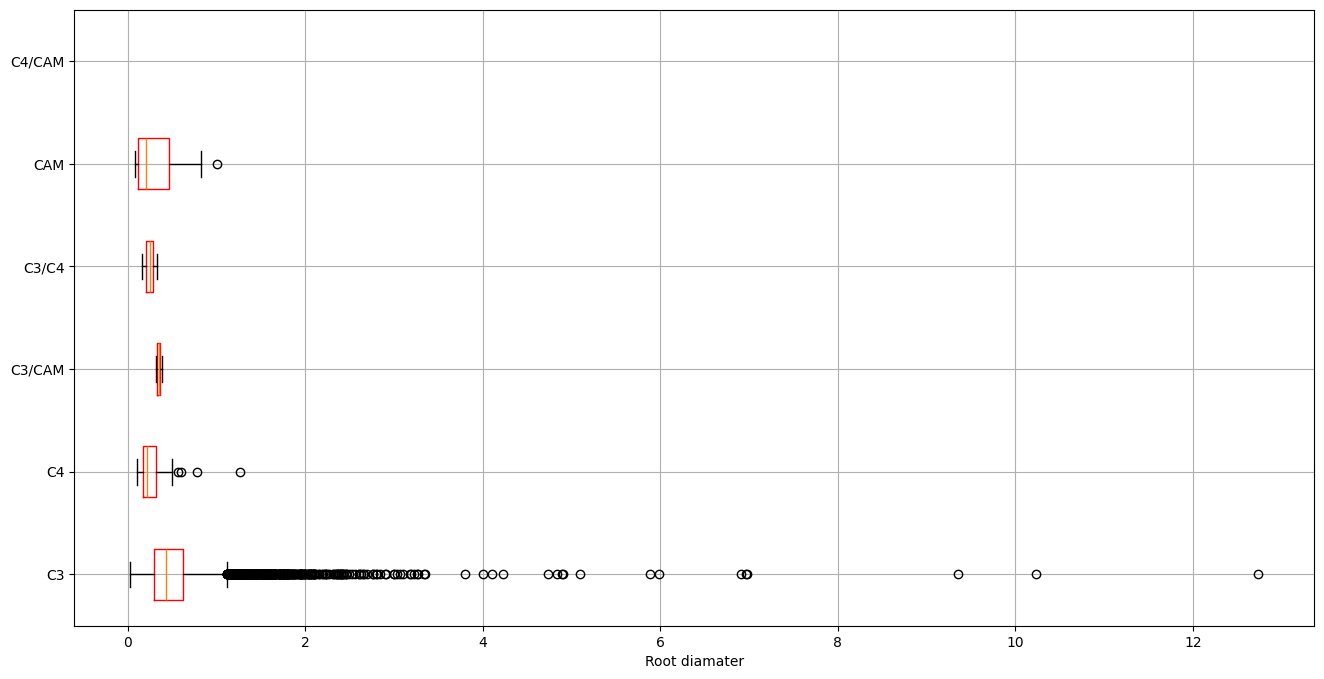

In [102]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_diameter.isna()) & (data.F00043 == pway), "root_diameter"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root diamater")
axes.grid()
plt.show()

In [101]:
data.loc[:, ["F00043", "root_cortex_thickness"]].dropna().F00043.unique() # that's disappointing

array(['C3', 'C4'], dtype=object)

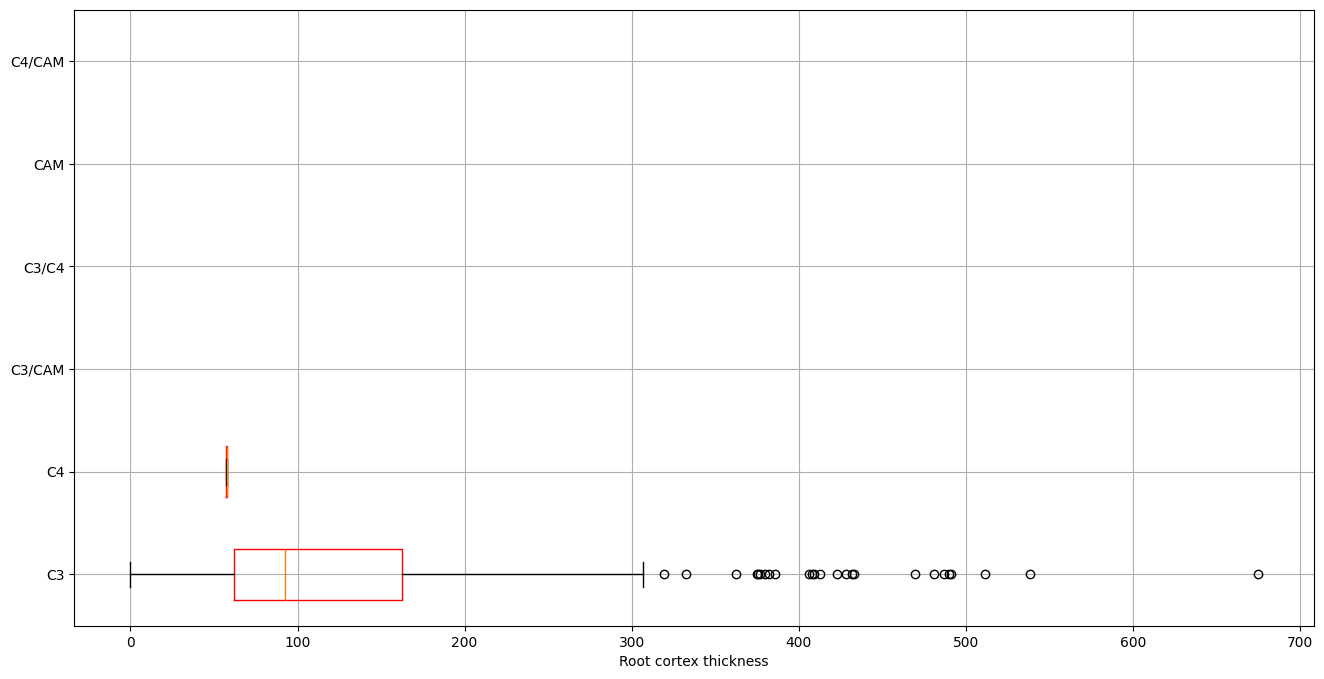

In [104]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_cortex_thickness.isna()) & (data.F00043 == pway), "root_cortex_thickness"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root cortex thickness")
axes.grid()
plt.show()

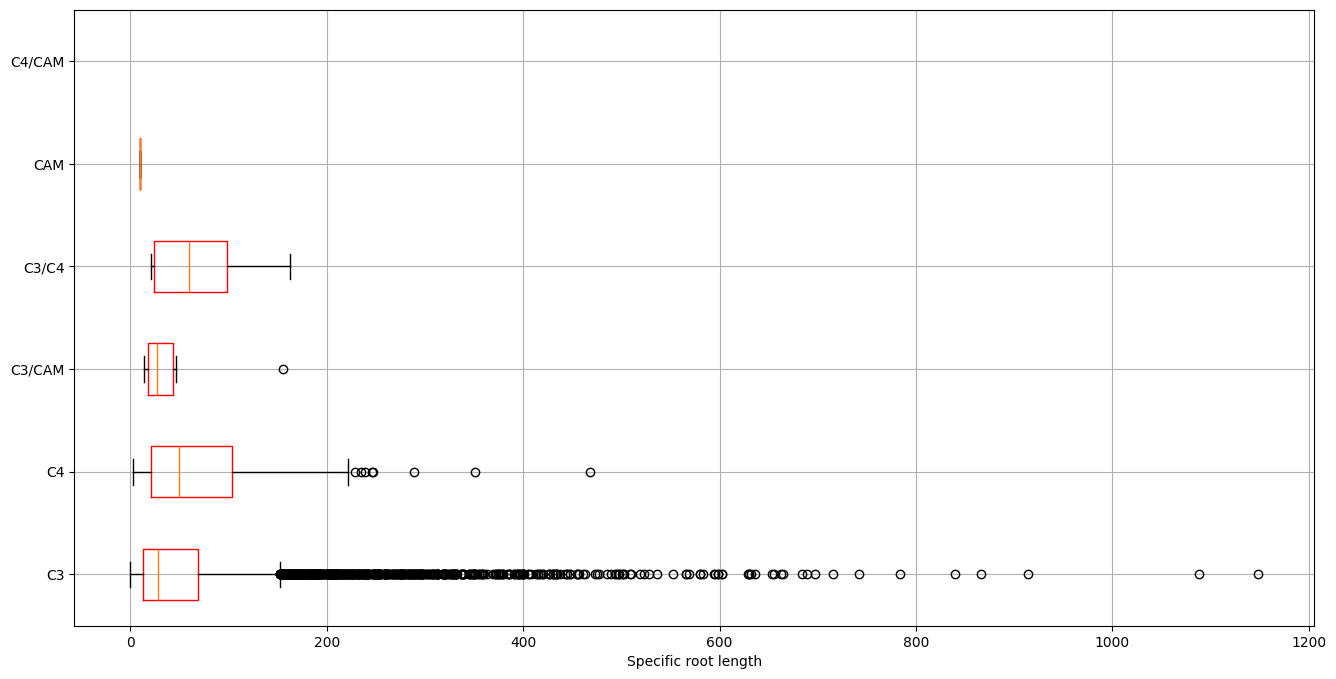

In [105]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.specific_root_length.isna()) & (data.F00043 == pway), "specific_root_length"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Specific root length")
axes.grid()
plt.show()